##  **supervised machine learning pipeline for Breast Cancer Wisconsin (Diagnostic)**



## Contents: 

1. Business probleme.    
2. Loading libraries.      
3. Loading the Dataset.    
4. Split the dataset into trian and test for reprocessing.    
5. Data Exploration.    
  5.1.checking the missing values.       
  5.2. checking Balanced target class.     
6. Data Preprocessing and Featuer Engineering.   
  6.1. Sepearating the Features and the Target Label.            
  6.2. Balancing the data.     
  6.3. Convert target Label (M) column to binary label (0 for benign and 1 for malignant).      
  6.4. Dimensionality Reduction.       
  6.5.algorithm selection and hyperparameter tuning.             
         6.5.1. Decission Tree.      
         6.5.2. SVM.
         6.5.3. Testing the Best Model.
  6.6. Standarization.      
7. Training the data.
8. Testing the best Model.
9. The Top Five Important Factors.
10. Conclusion.         
             
11. Assessment Submission form.


## 1- Business probleme 
Creating a machine learning model that can correctly **identify whether a specific breast mass is malignant or benign** using a collection of attributes collected from digital pictures of a fine needle aspirate (FNA) of the breast mass is the business challenge we will be tackling. Correct breast cancer categorization can result in earlier discovery and more efficient treatment, which may save lives and lower healthcare costs.
Data Set, which is available at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

## 2- Loading libraries

In [ ]:
import pandas as pd
import sklearn.model_selection
import sklearn.neighbors
import sklearn.svm
import sklearn.tree
import sklearn.metrics
import imblearn.over_sampling
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.manifold
import numpy as np
import sklearn.inspection

## 3- Loading the Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None)

- when i downlaoded the dataset i found it without header row definitions so i have to add it.

In [ ]:
column_names = ['ID', 'Diagnosis'] + ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
              'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
              'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
              'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
              'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df.columns = column_names
df=df.set_index("ID")
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(df['Diagnosis'].value_counts())

B    357
M    212
Name: Diagnosis, dtype: int64


##  4- Split the dataset into trian and test for reprocessing
- comment: we didn't split the data into test and train now first we have to check missing value.

In [ ]:
df_train,df_test =sklearn.model_selection.train_test_split(df)

print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df_train size: (426, 31)
df_test size: (143, 31)


## 5- Data Exploration
- Checking if there are missing values or not.
- Checking Balanced target class. 

## 5.1.checking the missing values:

In [ ]:
missing_values = pd.DataFrame(df.isnull().sum(), columns=['missing_values'])

print(missing_values)

                         missing_values
Diagnosis                             0
radius_mean                           0
texture_mean                          0
perimeter_mean                        0
area_mean                             0
smoothness_mean                       0
compactness_mean                      0
concavity_mean                        0
concave_points_mean                   0
symmetry_mean                         0
fractal_dimension_mean                0
radius_se                             0
texture_se                            0
perimeter_se                          0
area_se                               0
smoothness_se                         0
compactness_se                        0
concavity_se                          0
concave_points_se                     0
symmetry_se                           0
fractal_dimension_se                  0
radius_worst                          0
texture_worst                         0
perimeter_worst                       0


## 5.2. checking Balanced target class 

In [ ]:
df_train["Diagnosis"].value_counts()

B    276
M    150
Name: Diagnosis, dtype: int64

- There is **no missing value** in the dataset
- **but** form the "target" result for target we can see that **the data is imbalanced** in the target label class so we have to do some data Preprocessing Balancing the data using The synthetic minority oversampling technique (SMOTE)  and then we can do feature engineering.

## 6- data Preprocessing and Featuer Engineering.

## 6.1. Sepearating the Features and the Target Label

In [ ]:
x= df.drop(['Diagnosis'], axis=1)
y= df["Diagnosis"]
x_train, x_test, y_train, y_test =sklearn.model_selection.train_test_split(x,y)

print('df:',df.shape)
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

df: (569, 31)
x_train: (426, 30)
x_test: (143, 30)
y_train: (426,)
y_test: (143,)


## 6.2. Balancing the data.
- In terms of classification performance, we observed that oversampling the minority class produced the best performance.

In [ ]:
sm = imblearn.over_sampling.SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)
y_train.value_counts()

M    280
B    280
Name: Diagnosis, dtype: int64

## 6.3. Convert target Label (M) column to binary label (0 for benign and 1 for malignant).


In [ ]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

## 6.4. Dimensionality Reduction:
- when we get accuracy for model_1 (Decision tree) we found that the accuracy for the train stet greater then the accuracy for the test set so we get back to do Dimension reduction.  
- reducesing the dimensionality to n-components =10 that is gives the best performance after Exprimentation becouse the accuracy for the test set equal to the accuracy for the train set when n-components=10 and the variance _ratio not change even if we increase that number beyound 10.

In [ ]:
# building a PCA model
pca = sklearn.decomposition.PCA(n_components=10)
x_pca = pca.fit_transform(x)

# Reducing the number of training featuers 
x_train = pca.transform(x_train)

# Reducing the number of test featuers 
x_test = pca.transform(x_test)


print('Explained variance ratio:', pca.explained_variance_ratio_)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)


Explained variance ratio: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07]
x_train: (426, 10)
x_test: (143, 10)


## 6.5.algorithm selection and hyperparameter tuning 

## 6.5.1. Decission Tree
- after experimented different values and range for max_depth and min_sample_split the performane with max_depth= 10 and min_sample_split= 11 and get the best accuracy= 0.96 . 

In [ ]:
parameters_grid = {
    "criterion": ["gini","entropy"],
    "max_depth": range(1, 20, 3), 
    "min_samples_split": range(2, 20, 3)
}
model_1 =sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(),
                                              parameters_grid, scoring="accuracy", cv=5, n_jobs=-1)

model_1.fit(x_train, y_train)
print("accuracy of best decision tree classfier = {:.2f}".format(model_1.best_score_))
print("Best found hyoerparameters of decision tree classfier ={}".format(model_1.best_params_))

accuracy of best decision tree classfier = 0.96
Best found hyoerparameters of decision tree classfier ={'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 11}


## 6.5.2. SVM
- after experimented different values of C with kernel (rbf, poly) we found that best performance with best accuracy with C= 10 and kernel "rbf" the and get the best accuracy= 0.97. 
- model_2 (SVM) is the best model to the test set becouse it has the best accuracy.

In [ ]:
parameters_grid = {
    "kernel": ["rbf", "poly"],
    "C":[ 0.001, 0.01, 1, 10, 100]
}
model_2 =sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(),
                                              parameters_grid, scoring="accuracy", cv=5, n_jobs=-1)

model_2.fit(x_train, y_train)
print("accuracy of best SVM classfier = {:.2f}".format(model_2.best_score_))
print("Best found hyoerparameters of SVM classfier ={}".format(model_2.best_params_))

accuracy of best SVM classfier = 0.97
Best found hyoerparameters of SVM classfier ={'C': 10, 'kernel': 'rbf'}


## 6.5.3. Testing the Best Model
- when we test model_1(decision tree) without doing Dimension Reduction we found that the accuracy for the train set greater then the accuracy for the test set so we go back an add the Dimensionalty Reduction. 

In [ ]:
y_predicted = model_2.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
cm =sklearn.metrics.confusion_matrix(y_test, y_predicted)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(y_test, y_predicted)

data = {"Metric": ["accuracy", "Precision", "Recall", "F1-score"],
              "Score": [accuracy, precision, recall, f1]}
df_eval = pd.DataFrame(data)
print("Evaluation Matics:")
df_eval

Evaluation Matics:


,Metric,Score
0,accuracy,0.944056
1,Precision,"[0.96, 0.9264705882352942]"
2,Recall,"[0.935064935064935, 0.9545454545454546]"
3,F1-score,"[0.9473684210526316, 0.9402985074626866]"


- based on the evaluatin for the best model, the SVM model performed better then the decision tree model on the Breast Cancer Wisconsin dataset. the SVM model_2 achieved a 0.944 accuracy rating which mean that it correctly classified 95% of the Diagnosis in the testset, a 0.96 precision rating that indcates that the model good to prediction at 96% , a 0.95 recall rating that means the model correctly identfied 95% of the Diagnosis, and a 0.94 F1 score is the weighted average of precision and recall.
       
- These total results indicated that SVM model has doing great in predicting the diagnosis of breast cancer in the given dataset.

## 6.6. Standarization
- we do standerization to transform the datset distibution so it will effect on the model speed performance.

In [ ]:
#building a standardization model
scaler = sklearn.preprocessing.StandardScaler(with_mean=False)
scaler.fit(x_train)

#scaling the training features
x_train = scaler.transform(x_train)

#scaling the testing features
x_test = scaler.transform(x_test)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (426, 10)
x_test: (143, 10)


## 7. Training the data.

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (426, 10)
Shape of y_train: (426,)


In [ ]:
model = sklearn.svm.SVC()
model.fit(x_train, y_train)

SVC()

## 8. Testing the model

In [ ]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print("accuracy = " , accuracy)

accuracy =  0.9300699300699301


- The testing accuracy of the model, which is 0.93, is also relatively close to The Training accuracy of the model, that indicating that there no underfitting or overfitting for the model data.and the model have a reasonable performance to predictions.

## 9. The Top Five Important Factors:
- to get a result and coclusion for this pipeline we have to get the important features which caused the cancer breast.

In [ ]:
perm_importance = sklearn.inspection.permutation_importance(model, x_test, y_test)

top_indices = np.argsort(perm_importance.importances_mean)[::-1][:6]
top_Factors = df.columns[top_indices]

top_Factors = pd.DataFrame(top_Factors, columns=['top_Factors'])
print(top_Factors)

           top_Factors
0            Diagnosis
1       perimeter_mean
2            area_mean
3          radius_mean
4     compactness_mean
5  concave_points_mean


## 10. Conclusion:

In order to understand which characteristics are most useful for predicting the diagnosis of breast cancer, we may also examine the feature importance scores produced by the SVM model. The top five characteristics are, in decreasing order of importance:

1. perimeter_worst 
2. area_worst. 
3. radius_worst.  
4. compactness.   
5. concave points_worst. 

According to these findings, the mass's size, shape, and characteristics are the most major elements for identifying malignant from benign breast masses.


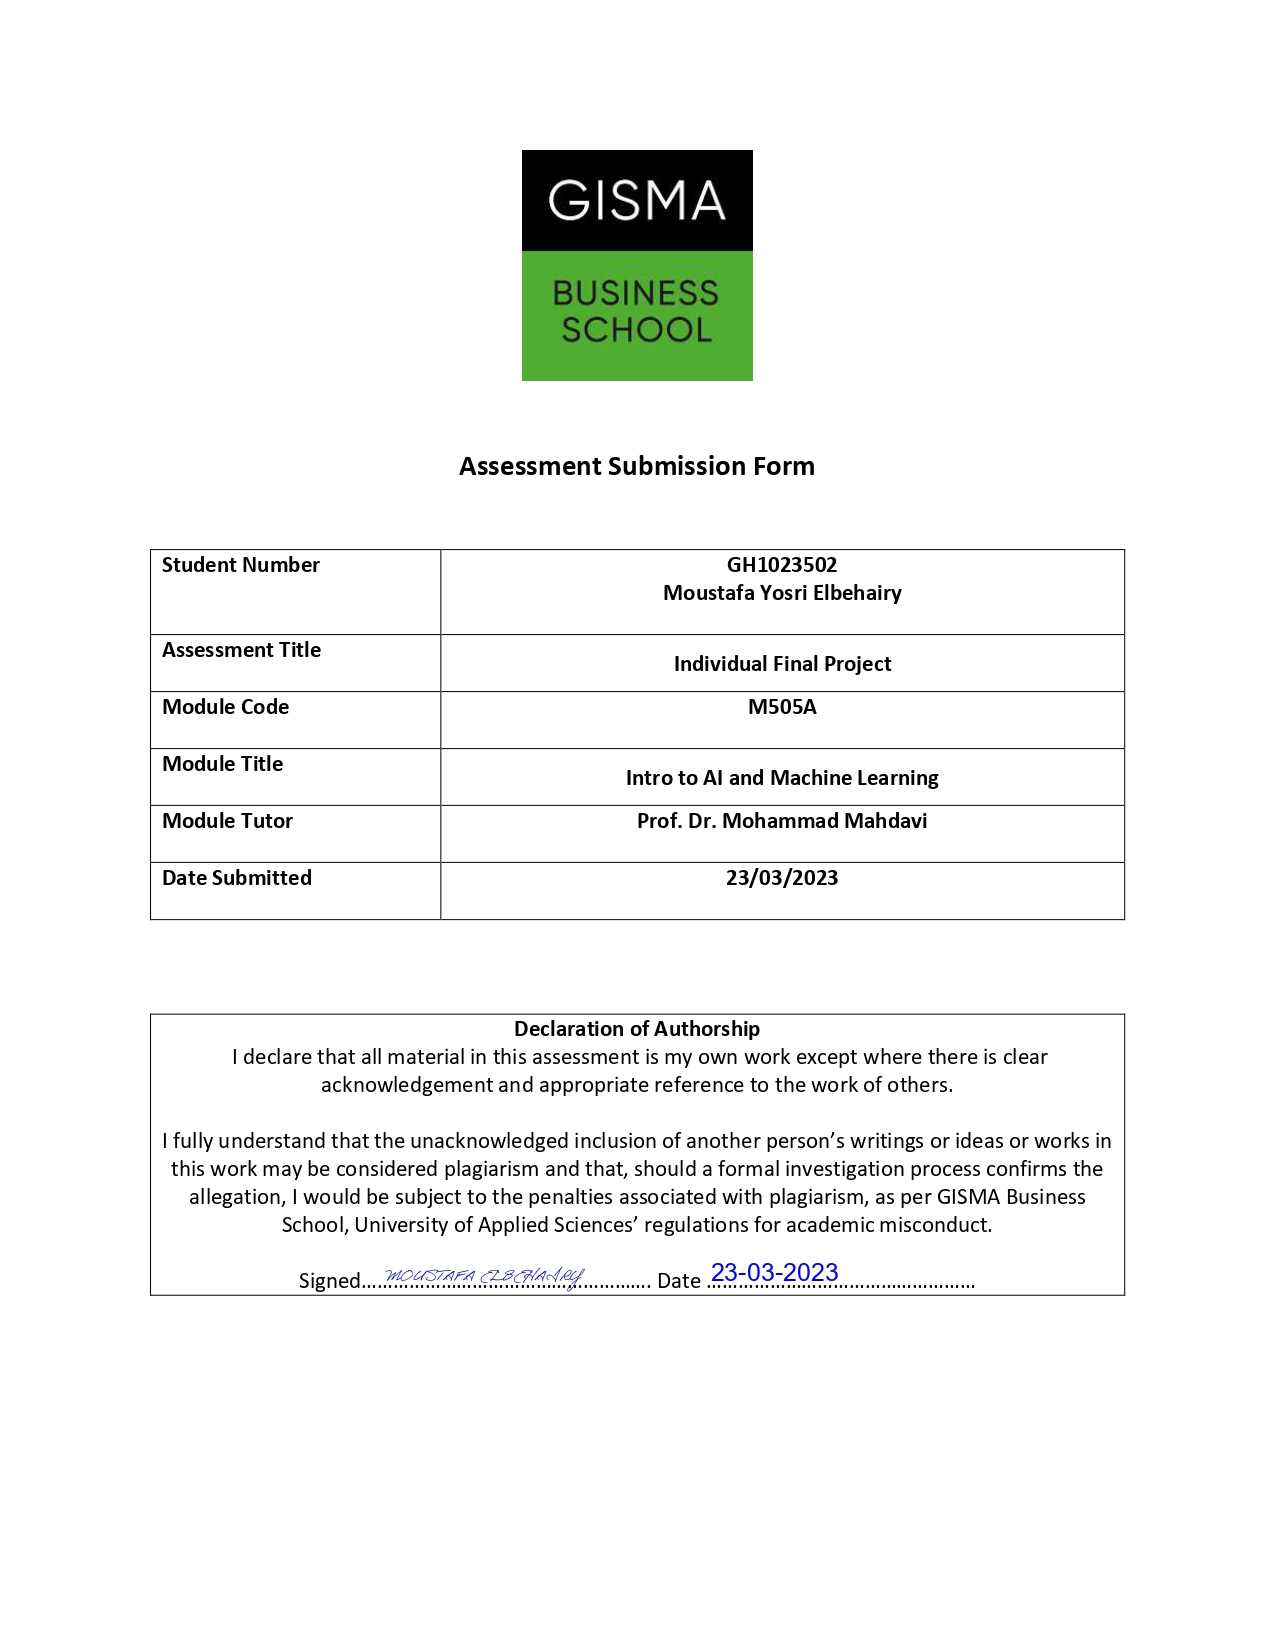